In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Resonator 1

11.077

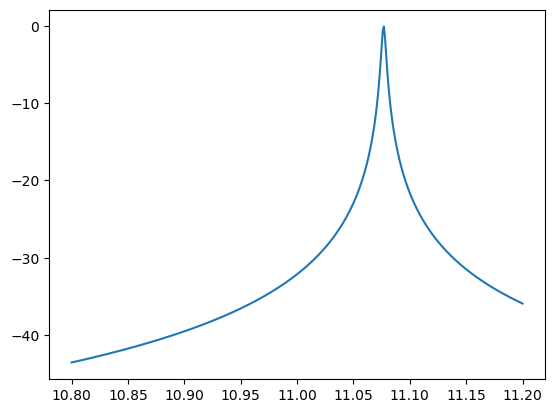

In [10]:
data1 = np.loadtxt('Simulation results/Resonator 1 - S21 dB.txt').T

plt.plot(data1[0],data1[1])
x_max = data1[0][np.argmax(data1[1])]
x_max

# Hopping rate

In [16]:
f_ghz=7 # GHz
f=f_ghz*1e9 # Hz
C=5.3e-15 #F
l= (16.8+0.026)*1e-3 # m
C_l=1.7e-10 # F/m
Z=50

t= -(1/2 * f*C*2/(C_l*l))*1e-9

t

-0.012970123268610904

# Eigenvalues

In [24]:
indexes = [(0,1),(1,2),(2,3),(3,4),(0,4),(1,0),(2,1),(3,2),(4,3),(4,0)]

ALG = np.zeros((5,5))
i = 0

for i in range(0,10):
    ALG[indexes[i][0]][indexes[i][1]] = 1

ALG


array([[0., 1., 0., 0., 1.],
       [1., 0., 1., 0., 0.],
       [0., 1., 0., 1., 0.],
       [0., 0., 1., 0., 1.],
       [1., 0., 0., 1., 0.]])

In [25]:
# list of eigenvalues

ev = np.sort(np.linalg.eigvals(ALG))
ev

array([-1.61803399, -1.61803399,  0.61803399,  0.61803399,  2.        ])

In [26]:
# Expeted frequencies

diagonal = f_ghz*np.ones(5)
H = -t*ALG
np.fill_diagonal(H,diagonal)

eigenv = np.sort(np.linalg.eigvals(H))
print(H, eigenv)

[[7.         0.01297012 0.         0.         0.01297012]
 [0.01297012 7.         0.01297012 0.         0.        ]
 [0.         0.01297012 7.         0.01297012 0.        ]
 [0.         0.         0.01297012 7.         0.01297012]
 [0.01297012 0.         0.         0.01297012 7.        ]] [6.9790139  6.9790139  7.00801598 7.00801598 7.02594025]
